In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from math import *

In [5]:
files = [file for file in os.listdir("./201719Data")]
all_years_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./201719Data/"+file)
    all_years_data = pd.concat([all_years_data, df])

all_years_data.to_csv("201719Chicago.csv", index=False)

In [2]:
all_data = pd.read_csv("201719Chicago.csv")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
all_data.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,Unnamed: 0
0,17536702.0,2018-01-01 00:12:00,2018-01-01 00:17:23,3304.0,323,69.0,Damen Ave & Pierce Ave,159.0,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,NaN
1,17536703.0,2018-01-01 00:41:35,2018-01-01 00:47:52,5367.0,377,253.0,Winthrop Ave & Lawrence Ave,325.0,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,NaN
2,17536704.0,2018-01-01 00:44:46,2018-01-01 01:33:10,4599.0,"2,904.00",98.0,LaSalle St & Washington St,509.0,Troy St & North Ave,Subscriber,Male,1989.0,NaN
3,17536705.0,2018-01-01 00:53:10,2018-01-01 01:05:37,2302.0,747,125.0,Rush St & Hubbard St,364.0,Larrabee St & Oak St,Subscriber,Male,1983.0,NaN
4,17536706.0,2018-01-01 00:53:37,2018-01-01 00:56:40,3696.0,183,129.0,Blue Island Ave & 18th St,205.0,Paulina St & 18th St,Subscriber,Male,1989.0,NaN


In [4]:
del all_data['from_station_id']
del all_data['to_station_id']
del all_data['trip_id']
del all_data['Unnamed: 0']

In [5]:
all_data.head()

,start_time,end_time,bikeid,tripduration,from_station_name,to_station_name,usertype,gender,birthyear
0,2018-01-01 00:12:00,2018-01-01 00:17:23,3304.0,323,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,2018-01-01 00:41:35,2018-01-01 00:47:52,5367.0,377,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,2018-01-01 00:44:46,2018-01-01 01:33:10,4599.0,"2,904.00",LaSalle St & Washington St,Troy St & North Ave,Subscriber,Male,1989.0
3,2018-01-01 00:53:10,2018-01-01 01:05:37,2302.0,747,Rush St & Hubbard St,Larrabee St & Oak St,Subscriber,Male,1983.0
4,2018-01-01 00:53:37,2018-01-01 00:56:40,3696.0,183,Blue Island Ave & 18th St,Paulina St & 18th St,Subscriber,Male,1989.0


In [6]:
all_data['start_time'] = pd.to_datetime(all_data["start_time"])
all_data['end_time'] = pd.to_datetime(all_data["end_time"])
all_data['year'] = all_data["start_time"].dt.year
all_data['month'] = all_data["start_time"].dt.month
all_data.head()

,start_time,end_time,bikeid,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,year,month
0,2018-01-01 00:12:00,2018-01-01 00:17:23,3304.0,323,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,2018.0,1.0
1,2018-01-01 00:41:35,2018-01-01 00:47:52,5367.0,377,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,2018.0,1.0
2,2018-01-01 00:44:46,2018-01-01 01:33:10,4599.0,"2,904.00",LaSalle St & Washington St,Troy St & North Ave,Subscriber,Male,1989.0,2018.0,1.0
3,2018-01-01 00:53:10,2018-01-01 01:05:37,2302.0,747,Rush St & Hubbard St,Larrabee St & Oak St,Subscriber,Male,1983.0,2018.0,1.0
4,2018-01-01 00:53:37,2018-01-01 00:56:40,3696.0,183,Blue Island Ave & 18th St,Paulina St & 18th St,Subscriber,Male,1989.0,2018.0,1.0


In [7]:
all_data['start_hour'] = all_data['start_time'].dt.hour
all_data['day_of_week'] = all_data['start_time'].dt.day_name()

In [8]:
all_data.head()

,start_time,end_time,bikeid,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,year,month,start_hour,day_of_week
0,2018-01-01 00:12:00,2018-01-01 00:17:23,3304.0,323,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,2018.0,1.0,0.0,Monday
1,2018-01-01 00:41:35,2018-01-01 00:47:52,5367.0,377,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,2018.0,1.0,0.0,Monday
2,2018-01-01 00:44:46,2018-01-01 01:33:10,4599.0,"2,904.00",LaSalle St & Washington St,Troy St & North Ave,Subscriber,Male,1989.0,2018.0,1.0,0.0,Monday
3,2018-01-01 00:53:10,2018-01-01 01:05:37,2302.0,747,Rush St & Hubbard St,Larrabee St & Oak St,Subscriber,Male,1983.0,2018.0,1.0,0.0,Monday
4,2018-01-01 00:53:37,2018-01-01 00:56:40,3696.0,183,Blue Island Ave & 18th St,Paulina St & 18th St,Subscriber,Male,1989.0,2018.0,1.0,0.0,Monday


In [9]:
all_data = all_data.replace(',','', regex=True)

In [12]:
all_data.head()

,start_time,end_time,bikeid,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,year,month,start_hour,day_of_week
0,2018-01-01 00:12:00,2018-01-01 00:17:23,3304.0,323.0,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,2018.0,1.0,0.0,Monday
1,2018-01-01 00:41:35,2018-01-01 00:47:52,5367.0,377.0,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,2018.0,1.0,0.0,Monday
2,2018-01-01 00:44:46,2018-01-01 01:33:10,4599.0,2904.0,LaSalle St & Washington St,Troy St & North Ave,Subscriber,Male,1989.0,2018.0,1.0,0.0,Monday
3,2018-01-01 00:53:10,2018-01-01 01:05:37,2302.0,747.0,Rush St & Hubbard St,Larrabee St & Oak St,Subscriber,Male,1983.0,2018.0,1.0,0.0,Monday
4,2018-01-01 00:53:37,2018-01-01 00:56:40,3696.0,183.0,Blue Island Ave & 18th St,Paulina St & 18th St,Subscriber,Male,1989.0,2018.0,1.0,0.0,Monday


In [19]:
all_data['tripduration']=all_data['tripduration']/60

In [20]:
all_data.head()

,start_time,end_time,bikeid,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,year,month,start_hour,day_of_week
0,2018-01-01 00:12:00,2018-01-01 00:17:23,3304.0,5.383333,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,2018.0,1.0,0.0,Monday
1,2018-01-01 00:41:35,2018-01-01 00:47:52,5367.0,6.283333,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,2018.0,1.0,0.0,Monday
2,2018-01-01 00:44:46,2018-01-01 01:33:10,4599.0,48.400000,LaSalle St & Washington St,Troy St & North Ave,Subscriber,Male,1989.0,2018.0,1.0,0.0,Monday
3,2018-01-01 00:53:10,2018-01-01 01:05:37,2302.0,12.450000,Rush St & Hubbard St,Larrabee St & Oak St,Subscriber,Male,1983.0,2018.0,1.0,0.0,Monday
4,2018-01-01 00:53:37,2018-01-01 00:56:40,3696.0,3.050000,Blue Island Ave & 18th St,Paulina St & 18th St,Subscriber,Male,1989.0,2018.0,1.0,0.0,Monday


In [21]:
all_data['tripduration'].describe()

count    1.125010e+07
mean     2.116689e+01
std      4.463493e+02
min      1.000000e+00
25%      6.716667e+00
50%      1.148333e+01
75%      2.013333e+01
max      2.389400e+05
Name: tripduration, dtype: float64

In [22]:
#Based on the pricing system I'd expect the majority of rides to be under 2 hours
#and no longer than 4 hours
no_outliers_data = all_data[all_data['tripduration'] < 240]
no_outliers_data.head()

,start_time,end_time,bikeid,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,year,month,start_hour,day_of_week
0,2018-01-01 00:12:00,2018-01-01 00:17:23,3304.0,5.383333,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,2018.0,1.0,0.0,Monday
1,2018-01-01 00:41:35,2018-01-01 00:47:52,5367.0,6.283333,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,2018.0,1.0,0.0,Monday
2,2018-01-01 00:44:46,2018-01-01 01:33:10,4599.0,48.400000,LaSalle St & Washington St,Troy St & North Ave,Subscriber,Male,1989.0,2018.0,1.0,0.0,Monday
3,2018-01-01 00:53:10,2018-01-01 01:05:37,2302.0,12.450000,Rush St & Hubbard St,Larrabee St & Oak St,Subscriber,Male,1983.0,2018.0,1.0,0.0,Monday
4,2018-01-01 00:53:37,2018-01-01 00:56:40,3696.0,3.050000,Blue Island Ave & 18th St,Paulina St & 18th St,Subscriber,Male,1989.0,2018.0,1.0,0.0,Monday


In [23]:
no_outliers_data['tripduration'].describe()

count    1.122960e+07
mean     1.687597e+01
std      1.907206e+01
min      1.000000e+00
25%      6.700000e+00
50%      1.146667e+01
75%      2.006667e+01
max      2.399833e+02
Name: tripduration, dtype: float64

In [97]:
# Save cleaned data to a csv file to begin analysis
cleaned_data = no_outliers_data
cleaned_data.to_csv("201719ChicagoCleaned.csv", index=False)

#### Start of Data Analysis

In [2]:
data = pd.read_csv("201719ChicagoCleaned.csv")
data.head()

,start_time,end_time,bikeid,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,year,month,start_hour,day_of_week
0,2018-01-01 00:12:00,2018-01-01 00:17:23,3304.0,5.383333,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,2018.0,1.0,0.0,Monday
1,2018-01-01 00:41:35,2018-01-01 00:47:52,5367.0,6.283333,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,2018.0,1.0,0.0,Monday
2,2018-01-01 00:44:46,2018-01-01 01:33:10,4599.0,48.400000,LaSalle St & Washington St,Troy St & North Ave,Subscriber,Male,1989.0,2018.0,1.0,0.0,Monday
3,2018-01-01 00:53:10,2018-01-01 01:05:37,2302.0,12.450000,Rush St & Hubbard St,Larrabee St & Oak St,Subscriber,Male,1983.0,2018.0,1.0,0.0,Monday
4,2018-01-01 00:53:37,2018-01-01 00:56:40,3696.0,3.050000,Blue Island Ave & 18th St,Paulina St & 18th St,Subscriber,Male,1989.0,2018.0,1.0,0.0,Monday


In [3]:
# Create dataframes for each year
grouped = data.groupby(data['year'])
df1 = grouped.get_group(2017.0)
df2 = grouped.get_group(2018.0)
df3 = grouped.get_group(2019.0)

In [4]:
genders = data['gender'].value_counts().keys().to_list()
counts = data['gender'].value_counts().tolist()

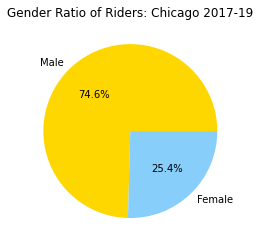

In [5]:
#Gender: 0=Unknown, 1=Male, 2=Female
plt.pie(counts, labels=genders, colors = ['gold', 'lightskyblue'], autopct='%1.1f%%')
plt.title('Gender Ratio of Riders: Chicago 2017-19')
plt.show()
# based on users that provided their gender

In [6]:
users = data['usertype'].value_counts().keys().to_list()
count = data['usertype'].value_counts().to_list()

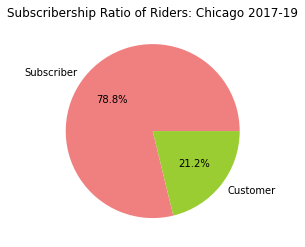

In [7]:
plt.pie(count[0:2], labels=users[0:2], colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Chicago 2017-19")
plt.show()

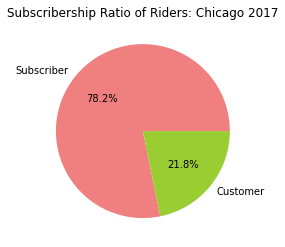

In [8]:
users_17 = df1['usertype'].value_counts().keys().to_list()
count_17 = df1['usertype'].value_counts().to_list()

plt.pie(count_17[0:2], labels=users_17[0:2], colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Chicago 2017")
plt.show()

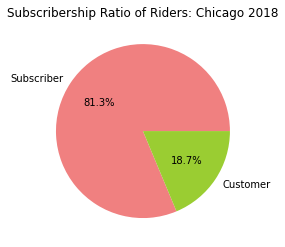

In [9]:
users_18 = df2['usertype'].value_counts().keys().to_list()
count_18 = df2['usertype'].value_counts().to_list()

plt.pie(count_18[0:2], labels=users_18[0:2], colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Chicago 2018")
plt.show()

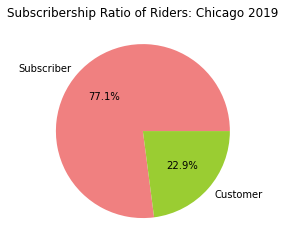

In [10]:
users_19 = df3['usertype'].value_counts().keys().to_list()
count_19 = df3['usertype'].value_counts().to_list()

plt.pie(count_19[0:2], labels=users_19[0:2], colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Chicago 2019")
plt.show()

In [11]:
birth_dict = dict(zip(data['birthyear'].value_counts().keys().to_list(), data['birthyear'].value_counts().to_list()))
#Remove birth years that don't make sense (any age more than 80 is removed)
cleaned_birth = {}
for key in birth_dict:
        if(int(key)>=1939):
            if(int(key)<=2003):
                cleaned_birth[int(key)]=birth_dict[key]

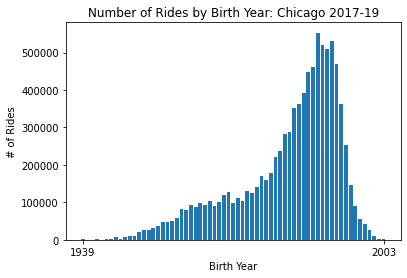

In [12]:
plt.bar(list(cleaned_birth.keys()), list(cleaned_birth.values()))
plt.xticks((1939,2003))
plt.xlabel("Birth Year")
plt.ylabel("# of Rides")
plt.title("Number of Rides by Birth Year: Chicago 2017-19")
plt.show()

In [13]:
#track ridership per year
years = data['year'].value_counts().keys().to_list()
rides = data['year'].value_counts().to_list()

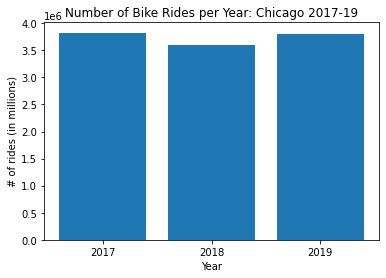

In [14]:
plt.bar(years, rides)
plt.xticks(years)
plt.xlabel("Year")
plt.ylabel("# of rides (in millions)")
plt.title("Number of Bike Rides per Year: Chicago 2017-19")
plt.show()

In [15]:
num_bikes_year =[]
num_bikes1 = len(df1['bikeid'].unique())
num_bikes_year.append(num_bikes1)

In [16]:
num_bikes2 = len(df2['bikeid'].unique())
num_bikes_year.append(num_bikes2)

In [17]:
num_bikes3 = len(df3['bikeid'].unique())
num_bikes_year.append(num_bikes3)

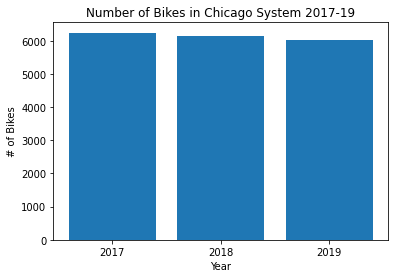

In [18]:
plt.bar([2017, 2018, 2019], num_bikes_year)
plt.xticks([2017, 2018, 2019])
plt.xlabel("Year")
plt.ylabel("# of Bikes")
plt.title("Number of Bikes in Chicago System 2017-19")
plt.show()

In [19]:
#track rides by day of week over 3 year period
days = data['day_of_week'].value_counts().keys().to_list()
rides = data['day_of_week'].value_counts().to_list()
#Hardcoded the sorting into order of the week
days_sorted = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_sorted = [1665263,1720840,1700944,1698578,1655671,1467312,1320997]

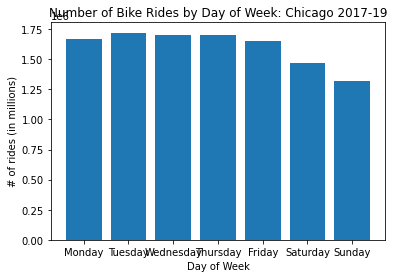

In [20]:
plt.bar(days_sorted, rides_sorted)
plt.xticks(days_sorted)
plt.xlabel("Day of Week")
plt.ylabel("# of rides (in millions)")
plt.title("Number of Bike Rides by Day of Week: Chicago 2017-19")
plt.show()

In [21]:
#Make a data frame for weekdays and weekend
mask = data['day_of_week'].isin(['Saturday','Sunday'])
weekend_df=data[mask]
weekday_df=data[~mask]

In [22]:
weekend_hours = weekend_df['start_hour'].value_counts().keys().to_list()
weekend_count = weekend_df['start_hour'].value_counts().to_list()

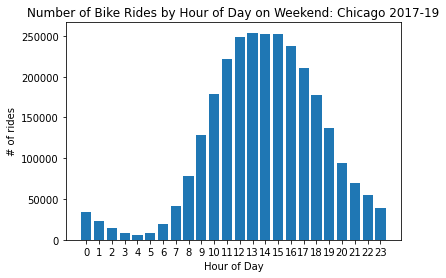

In [23]:
plt.bar(weekend_hours, weekend_count)
plt.xticks(weekend_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day on Weekend: Chicago 2017-19")
plt.show()

In [24]:
weekday_hours = weekday_df['start_hour'].value_counts().keys().to_list()
weekday_count = weekday_df['start_hour'].value_counts().to_list()

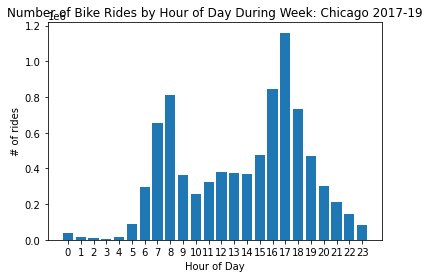

In [25]:
plt.bar(weekday_hours, weekday_count)
plt.xticks(weekday_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day During Week: Chicago 2017-19")
plt.show()

In [26]:
weekend_dict = dict(zip(weekend_hours, weekend_count))
weekend_keys = (list(weekend_dict.keys()))
weekend_keys.sort()

weekend_sorted={}
for e in weekend_keys:
    weekend_sorted[e]=weekend_dict[e]

weekend_keys = list(weekend_sorted.keys())
weekend_values = list(weekend_sorted.values())

In [27]:
weekday_dict = dict(zip(weekday_hours, weekday_count))
weekday_keys = (list(weekday_dict.keys()))
weekday_keys.sort()

weekday_sorted={}
for e in weekday_keys:
    weekday_sorted[e]=weekday_dict[e]

weekday_keys = list(weekday_sorted.keys())
weekday_values = list(weekday_sorted.values())

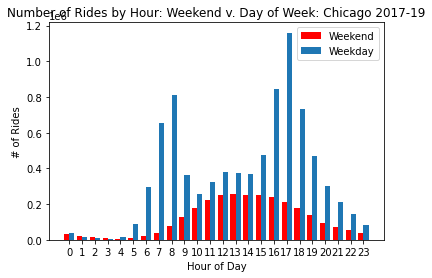

In [28]:
x = np.arange(len(weekend_keys))
ax = plt.subplot(111)
ax.bar(x-0.2, weekend_values, width=0.4, color='r', align='center', label='Weekend')
ax.bar(x+0.2, weekday_values, width=0.4, align='center', label='Weekday')
plt.xticks(weekend_keys)
plt.xlabel('Hour of Day')
plt.ylabel('# of Rides')
plt.title('Number of Rides by Hour: Weekend v. Day of Week: Chicago 2017-19')
plt.legend(loc = 'best')
plt.show()

In [29]:
#track rides by month over 3 year period
months = data['month'].value_counts().keys().to_list()
num_riders = data['month'].value_counts().to_list()

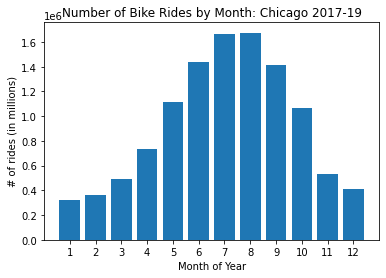

In [30]:
plt.bar(months, num_riders)
plt.xticks(months)
plt.xlabel("Month of Year")
plt.ylabel("# of rides (in millions)")
plt.title("Number of Bike Rides by Month: Chicago 2017-19")
plt.show()

In [31]:
#track most common and least common start stations over 3 year period
start_stations = data['from_station_name'].value_counts().keys().to_list()
num_start = data['from_station_name'].value_counts().to_list()

start_dict = dict(zip(start_stations, num_start))

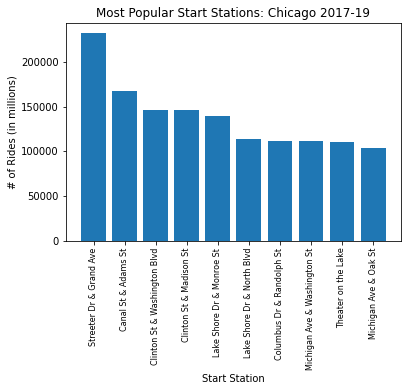

In [32]:
plt.bar(start_stations[0:10], num_start[0:10])
plt.xticks(start_stations[0:10], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides (in millions)")
plt.title("Most Popular Start Stations: Chicago 2017-19")
plt.show()

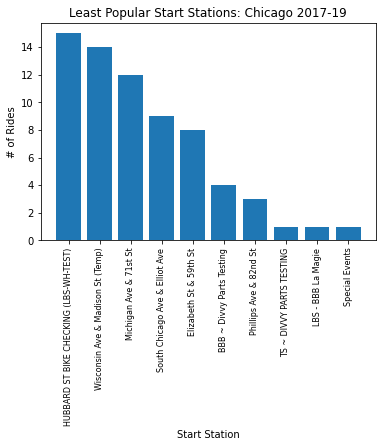

In [33]:
plt.bar(start_stations[-10:], num_start[-10:])
plt.xticks(start_stations[-10:], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Least Popular Start Stations: Chicago 2017-19")
plt.show()

In [34]:
#track most common and leas common end stations over 3 year period
end_stations = data['to_station_name'].value_counts().keys().to_list()
num_end = data['to_station_name'].value_counts().to_list()

end_dict = dict(zip(end_stations, num_end))

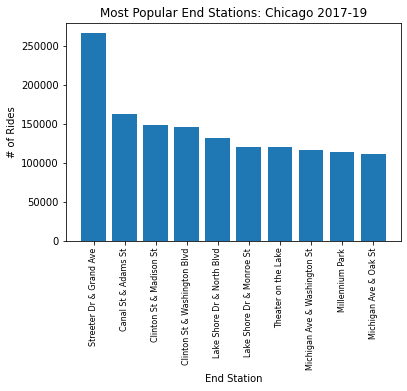

In [35]:
plt.bar(end_stations[0:10], num_end[0:10])
plt.xticks(end_stations[0:10], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Most Popular End Stations: Chicago 2017-19")
plt.show()

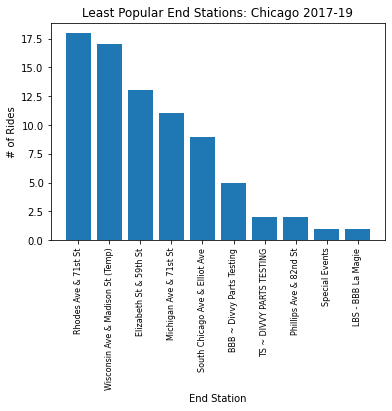

In [36]:
plt.bar(end_stations[-10:], num_end[-10:])
plt.xticks(end_stations[-10:], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Least Popular End Stations: Chicago 2017-19")
plt.show()

In [37]:
#combine start and end dicts and sort by value
def combine(d1, d2):
    new_dict=d1
    for key in d2:
        if key in new_dict:
            new_dict[key] += d2[key]
        else:
            new_dict[key]=d2[key]
    return new_dict

#Sort overall dict by value in increasing order to identify top and bottom stations
overall_dict = combine(start_dict, end_dict)
overall_dict={k: v for k, v in sorted(overall_dict.items(), key=lambda item: item[1])}


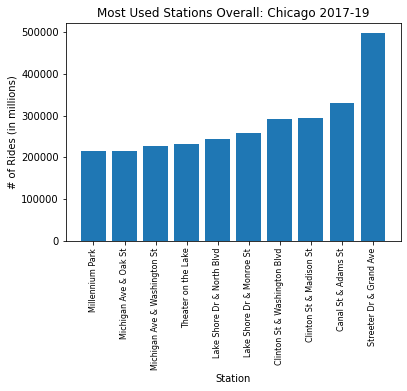

In [38]:
plt.bar((list(overall_dict.keys()))[-10:], (list(overall_dict.values()))[-10:])
plt.xticks((list(overall_dict.keys()))[-10:], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides (in millions)")
plt.title("Most Used Stations Overall: Chicago 2017-19")
plt.show()


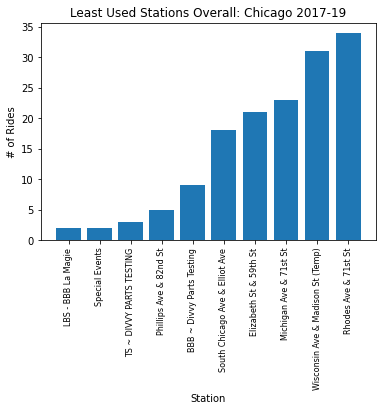

In [39]:
plt.bar((list(overall_dict.keys()))[0:10], (list(overall_dict.values()))[0:10])
plt.xticks((list(overall_dict.keys()))[0:10], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Least Used Stations Overall: Chicago 2017-19")
plt.show()

In [40]:
#How does the number of stations change?
num_stations=[]
stations_2017 = len(list(pd.concat([df1['from_station_name'], df1['to_station_name']]).unique()))
num_stations.append(stations_2017)

In [41]:
stations_2018 = len(list(pd.concat([df2['from_station_name'], df2['to_station_name']]).unique()))
num_stations.append(stations_2018)

In [42]:
stations_2019 = len(list(pd.concat([df3['from_station_name'], df3['to_station_name']]).unique()))
num_stations.append(stations_2019)

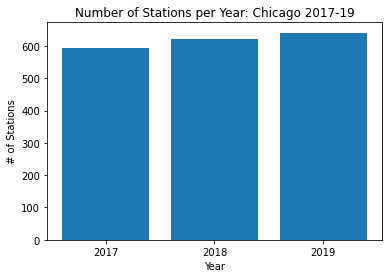

In [43]:
plt.bar([2017,2018,2019], num_stations)
plt.xticks([2017,2018,2019])
plt.xlabel("Year")
plt.ylabel("# of Stations")
plt.title("Number of Stations per Year: Chicago 2017-19")
plt.show()

In [44]:
#determine tripduration statistics (min, max, average, std, etc.)
data['tripduration'].describe()

count    1.122960e+07
mean     1.687597e+01
std      1.907206e+01
min      1.000000e+00
25%      6.700000e+00
50%      1.146667e+01
75%      2.006667e+01
max      2.399833e+02
Name: tripduration, dtype: float64

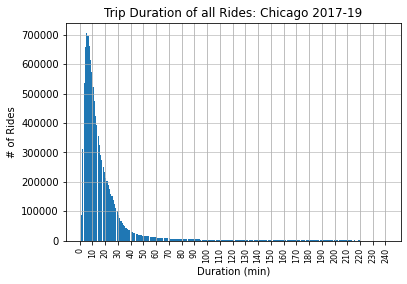

In [45]:
times = data['tripduration']
times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of all Rides: Chicago 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

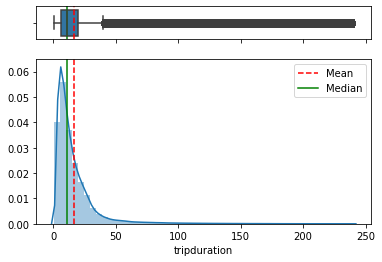

In [46]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=data['tripduration'].mean()
median=data['tripduration'].median()

sns.boxplot(data['tripduration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(data['tripduration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [47]:
#Subcriber v Customer Rides
grouped_user = data.groupby(data['usertype'])
df_sub = grouped_user.get_group('Subscriber')
df_cust = grouped_user.get_group('Customer')

In [48]:
df_sub['tripduration'].describe()

count    8.849725e+06
mean     1.209894e+01
std      9.474990e+00
min      1.000000e+00
25%      5.966667e+00
50%      9.616667e+00
75%      1.558333e+01
max      2.399500e+02
Name: tripduration, dtype: float64

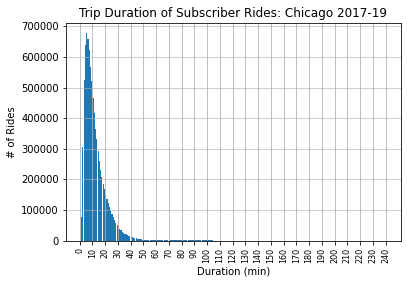

In [49]:
sub_times = df_sub['tripduration']
sub_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Subscriber Rides: Chicago 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

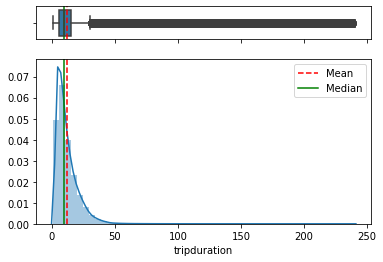

In [50]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_sub['tripduration'].mean()
median=df_sub['tripduration'].median()

sns.boxplot(df_sub['tripduration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_sub['tripduration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [51]:
df_cust['tripduration'].describe()

count    2.379873e+06
mean     3.463973e+01
std      3.133856e+01
min      1.000000e+00
25%      1.565000e+01
50%      2.486667e+01
75%      4.096667e+01
max      2.399833e+02
Name: tripduration, dtype: float64

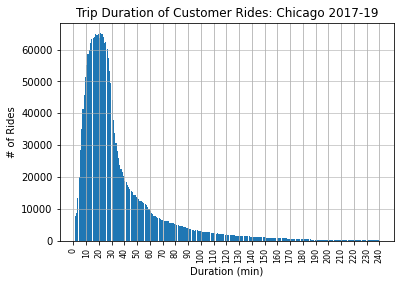

In [52]:
cust_times = df_cust['tripduration']
cust_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Customer Rides: Chicago 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

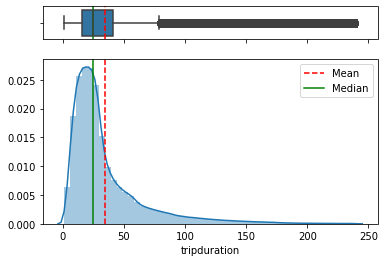

In [53]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_cust['tripduration'].mean()
median=df_cust['tripduration'].median()

sns.boxplot(df_cust['tripduration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_cust['tripduration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [56]:
weekend_df['tripduration'].describe()

count    2.788309e+06
mean     2.231503e+01
std      2.438189e+01
min      1.000000e+00
25%      8.233333e+00
50%      1.530000e+01
75%      2.630000e+01
max      2.399833e+02
Name: tripduration, dtype: float64

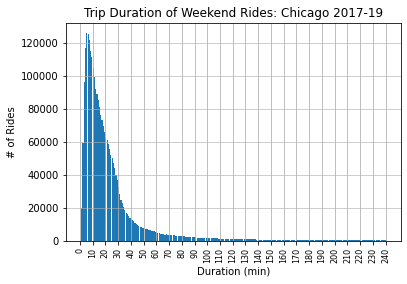

In [57]:
weekend_times = weekend_df['tripduration']
weekend_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekend Rides: Chicago 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

In [58]:
weekday_df['tripduration'].describe()

count    8.441296e+06
mean     1.507936e+01
std      1.656891e+01
min      1.000000e+00
25%      6.366667e+00
50%      1.058333e+01
75%      1.801667e+01
max      2.399833e+02
Name: tripduration, dtype: float64

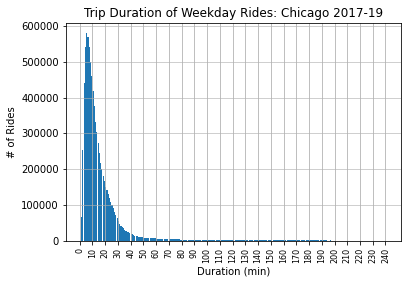

In [60]:
weekday_times = weekday_df['tripduration']
weekday_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekday Rides: Chicago 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)